# Projeto 8: Classificação de sinais de trânsito

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1: Importação das bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.12.0'

# Etapa 2: Importação da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning Prático com TensorFlow e Python/databases/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [ ]:
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
train["features"].shape

(34799, 32, 32, 3)

In [ ]:
x_train, y_train = train["features"], train["labels"]
x_test, y_test = test["features"], test["labels"]
x_validation, y_validation = valid["features"], valid["labels"]

In [ ]:
print("Treinamento:", x_train.shape, y_train.shape)
print("Teste:      ", x_test.shape, y_test.shape)
print("Validação:  ", x_validation.shape, y_validation.shape)

Treinamento: (34799, 32, 32, 3) (34799,)
Teste:       (12630, 32, 32, 3) (12630,)
Validação:   (4410, 32, 32, 3) (4410,)


# Etapa 3: Visualização dos Dados

1


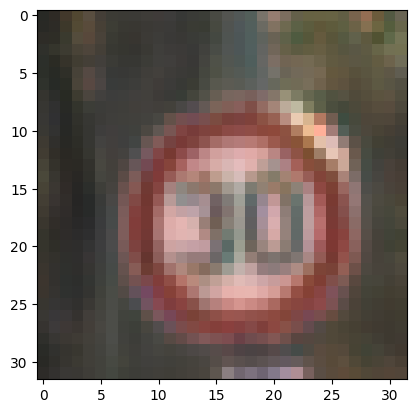

In [ ]:
i = 3100
plt.imshow(x_train[i])
print(y_train[i])

# Etapa 4: Preparação dos Dados

In [ ]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_train[0][0][0]

array([68, 56, 47], dtype=uint8)

In [ ]:
(255 / 3) + (239 / 3) + (235 / 3)

243.0

In [ ]:
x_train_gray = np.sum(x_train / 3, axis = 3, keepdims=True)
x_test_gray = np.sum(x_test / 3, axis = 3, keepdims=True)
x_validation_gray = np.sum(x_validation / 3, axis = 3, keepdims=True)

In [ ]:
x_train_gray[0][0][0]

array([57.])

In [ ]:
x_train_gray.shape, x_test_gray.shape, x_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [ ]:
x_train_gray_norm = (x_train_gray - 128) / 128
x_test_gray_norm = (x_test_gray - 128) / 128
x_validation_gray_norm = (x_validation_gray - 128) / 128

In [ ]:
x_train_gray_norm[0][0][0]

array([-0.5546875])

In [ ]:
print("MIN:", np.min(x_train_gray_norm))
print("MAX:", np.max(x_train_gray_norm))

MIN: -0.9713541666666666
MAX: 0.9921875


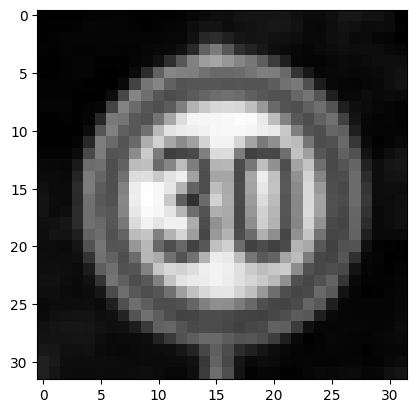

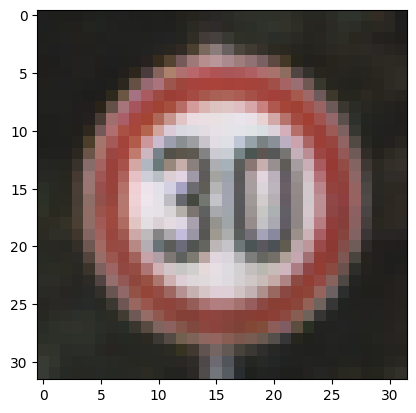

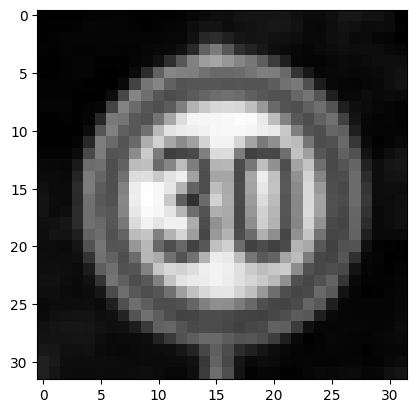

In [ ]:
i = 500
plt.imshow(x_validation_gray[i].reshape(32, 32), cmap='gray')
plt.figure()
plt.imshow(x_validation[i])
plt.figure()
plt.imshow(x_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Etapa 5: Criação do modelo e treinamento

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras import models

LeNet = models.Sequential()

# STEP 1
LeNet.add(Conv2D(6, (5,5), activation="relu", input_shape=(32,32,1)))
LeNet.add(AveragePooling2D())

# STEP 2
LeNet.add(Conv2D(16, (5,5), activation="relu"))
LeNet.add(AveragePooling2D())

# STEP 3
LeNet.add(Flatten())

# STEP 4
LeNet.add(Dense(120, activation='relu'))
LeNet.add(Dense(84, activation='relu'))
LeNet.add(Dense(43, activation='softmax'))

LeNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
LeNet.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = LeNet.fit(
    x_train_gray_norm,
    y_train,
    batch_size=500,
    epochs=50,
    validation_data=(x_validation_gray_norm, y_validation)
  )

Epoch 1/50
70/70 [==============================] - 13s 13ms/step - loss: 3.0461 - accuracy: 0.2039 - val_loss: 2.4970 - val_accuracy: 0.3188
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 1.5522 - accuracy: 0.5617 - val_loss: 1.3820 - val_accuracy: 0.5873
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.9274 - accuracy: 0.7304 - val_loss: 1.0805 - val_accuracy: 0.6844
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 0.6799 - accuracy: 0.8076 - val_loss: 0.8735 - val_accuracy: 0.7374
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5480 - accuracy: 0.8474 - val_loss: 0.8227 - val_accuracy: 0.7605
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4541 - accuracy: 0.8752 - val_loss: 0.7723 - val_accuracy: 0.7626
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8930 - val_loss: 0.6906 - val_accuracy: 0.7984
Epoch 8/50
70/70 [

# Etapa 6: Avaliação do modelo

In [ ]:
score = LeNet.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.3357 - accuracy: 0.8527
Test Accuracy: 0.8526524305343628


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
print(len(val_accuracy))
print(val_accuracy[0])
print(val_accuracy[10])
print(val_accuracy[20])
print(val_accuracy[30])
print(val_accuracy[-1])

50
0.31882086396217346
0.8165532946586609
0.8337868452072144
0.8501133918762207
0.8539682626724243


<ipython-input-27-46d7eff3f114>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')


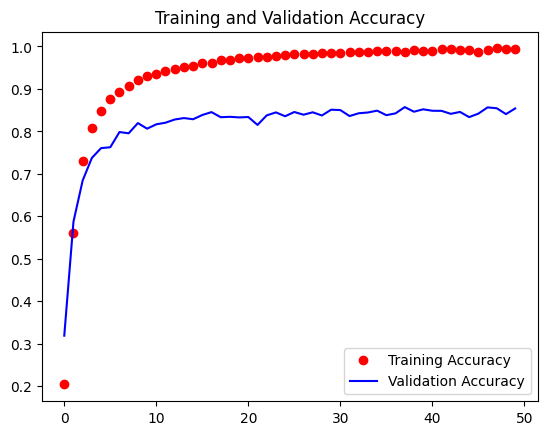

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', color = 'r', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend();

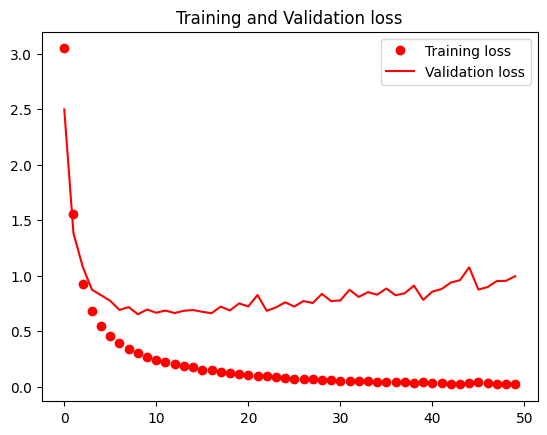

In [ ]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend();

In [ ]:
#predicted_classes = LeNet.predict_classes(X_test_gray_norm) -- Atualizado 17/01/22
#y_true = y_test

In [ ]:
predict_x = LeNet.predict(x_test_gray_norm)
predicted_classes=np.argmax(predict_x,axis=1)
y_true = y_test

395/395 [==============================] - 1s 3ms/step


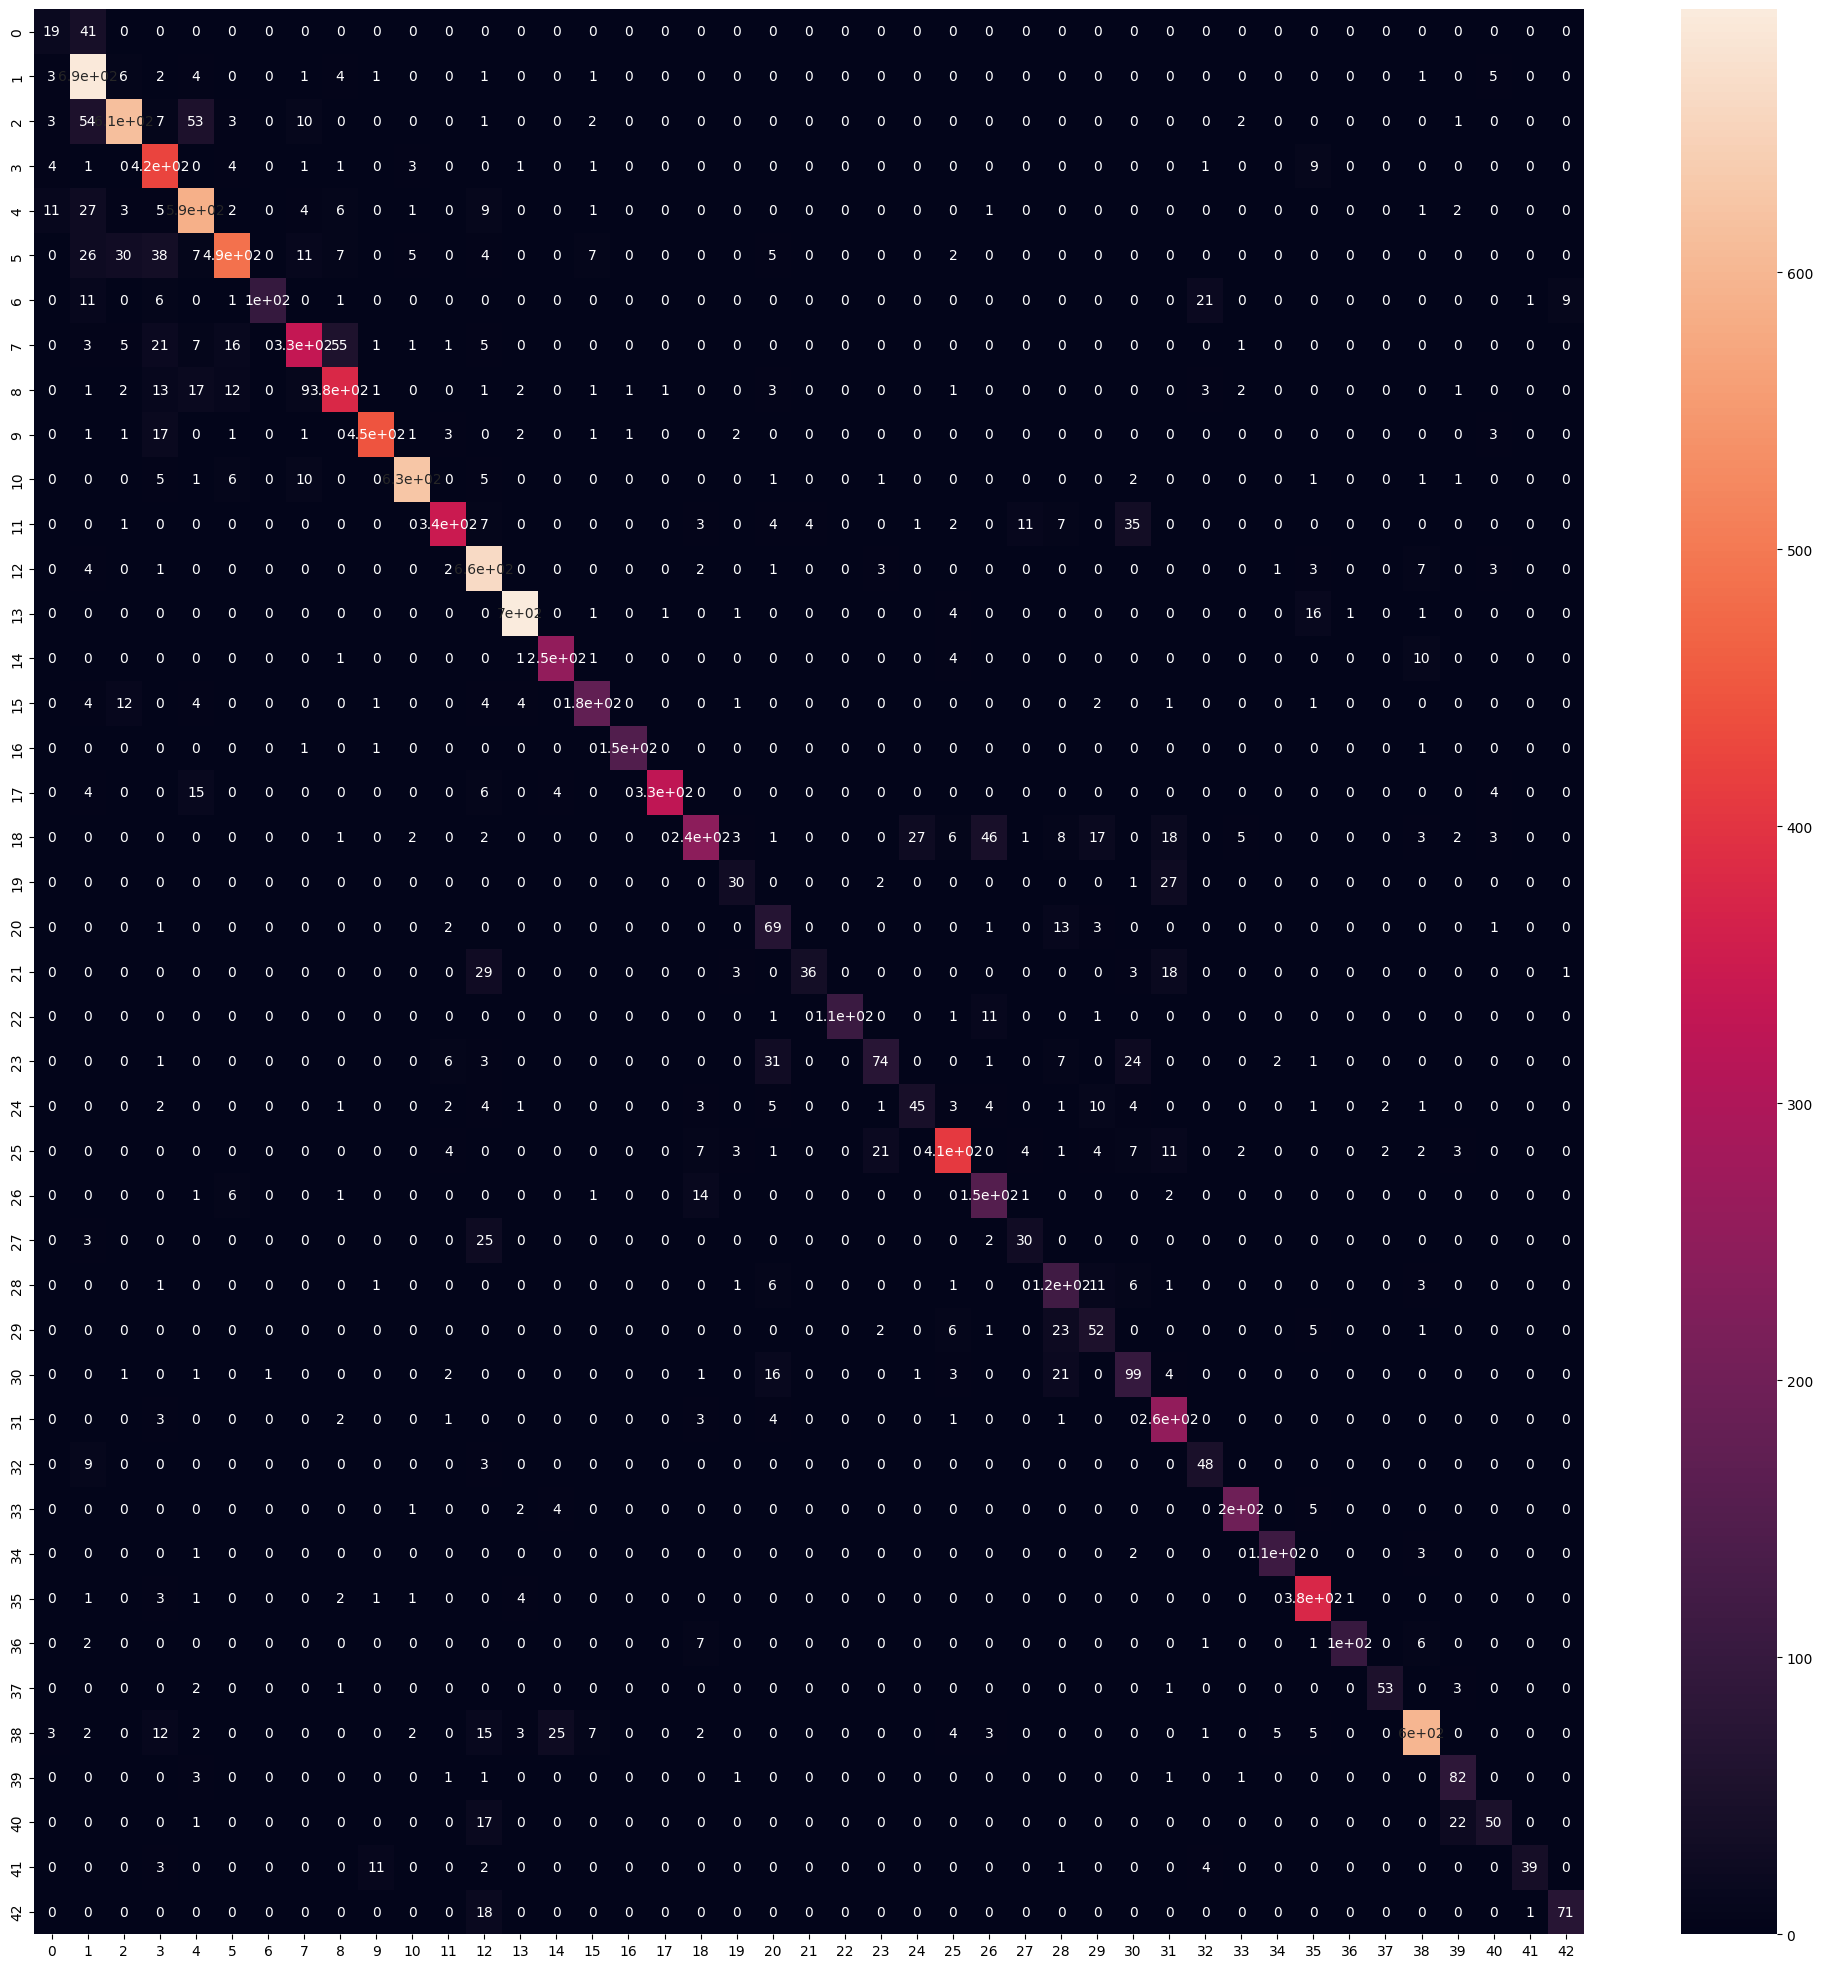

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True);

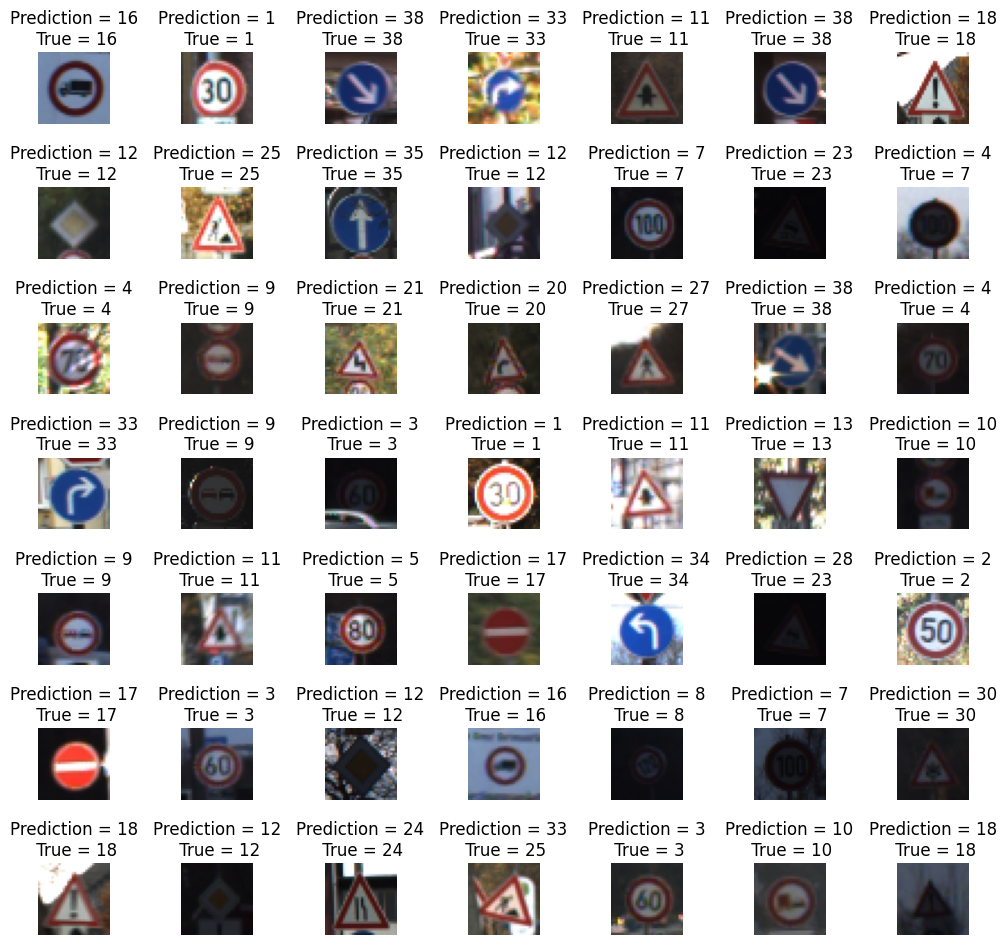

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)